# DECISION TREE ASSIGNMENT 

## Topic: Obesity Classification Using Decision Tree Algorithm

#### Dataset Source : https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset?select=Obesity+Classification.csv

## About Dataset


This dataset contains information about the obesity classification of individuals. The data was collected from a variety of sources, including medical records, surveys, and self-reported data. The dataset includes the following columns:

ID: A unique identifier for each individual

Age: The age of the individual

Gender: The gender of the individual

Height: The height of the individual in centimeters

Weight: The weight of the individual in kilograms

BMI: The body mass index of the individual, calculated as weight divided by height squared

Label: The obesity classification of the individual, which can be one of the following:
Normal Weight,
Overweight,
Obese,
Underweight.

### Problem Statement:
The increasing prevalence of obesity is a significant global health concern, with implications for public health systems and individual well-being. Early identification and classification of obesity levels can assist in targeted interventions and promote healthier lifestyles.

This project aims to build a predictive model using Decision Tree algorithms to classify individuals into four obesity categories — Underweight, Normal Weight, Overweight, and Obese — based on features such as age, gender, height, weight, and BMI.

Through this assignment, the goal is to explore the dataset, extract meaningful patterns, and interpret decision rules that explain how different physical and demographic attributes influence obesity status. The model should be evaluated for its performance and optimized using hyperparameter tuning and cross-validation techniques.

### Step 1: Importing Essential Libraries

#### To start any data analysis project, I load the essential Python libraries:

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### How It Help Us?
Pandas: Facilitates efficient handling and manipulation of structured datasets.

NumPy: Provides fast and powerful numerical operations, especially with arrays and mathematical functions.

Matplotlib: Used for creating basic plots and visualizing data trends.

Seaborn: Enhances data visualization with attractive and informative statistical graphics.

These libraries form the backbone of the data exploration workflow, enabling streamlined analysis and insightful visualizations.

######
## Step 2: Importing Machine Learning Tools
#### To build and evaluate a machine learning model, I import the necessary modules from Scikit-Learn:

In [337]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Purpose Behind the ML Tools :
train_test_split : Splits the dataset into training and testing sets.

GridSearchCV : Helps in hyperparameter tuning to find the best model.

DecisionTreeClassifier : The classifier used to train a decision tree.

LabelEncoder : Encodes categorical labels into numeric form.

Metrics : Evaluate the model using accuracy, confusion matrix, and detailed classification report.

These tools simplify the process of training, tuning, and evaluating machine learning models effectively.

######
## Step 3: Loading and Previewing the Dataset
#### To start working with the dataset, I load it into a pandas DataFrame:

In [341]:
df = pd.read_csv("Obesity Classification.csv")
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


#### First Look at the Data

Loading and Previewing the Dataset :

pd.read_csv : Reads the CSV file into a DataFrame.

df.head() : Displays the first few rows of the dataset for a quick preview.

This step allows me to get a first look at the data and understand its structure before diving into analysis.

######
## Step 4: Basic Overview of the Dataset
#### To understand the size of the dataset, I use:

In [345]:
# Basic overview
df.shape

(108, 7)

df.shape : Returns a tuple representing the number of rows and columns in the dataset. This helps in quickly assessing the dataset's dimensions.

It’s an essential step to ensure the data is loaded correctly and to understand its structure before further analysis.



######
## Step 5: Dropping Unnecessary Columns
#### To remove the 'ID' column from the dataset, I use:

In [349]:
df.drop('ID', axis=1, inplace=True)

##### How will it work :

df.drop : Removes the specified column or row.

'ID': The column to be dropped.

axis=1: Indicates that a column (not a row) is being removed.

inplace=True: Modifies the original DataFrame without creating a new one.

This step helps clean up the dataset by removing any unnecessary columns before analysis.

######
## Step 6: Checking Data Types and Null Values
#### To get a summary of the dataset, I use:

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     108 non-null    int64  
 1   Gender  108 non-null    object 
 2   Height  108 non-null    int64  
 3   Weight  108 non-null    int64  
 4   BMI     108 non-null    float64
 5   Label   108 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.2+ KB


######
df.info()  : Provides a concise overview of the dataset, including the number of non-null entries, data types, and memory usage. This helps in identifying missing values and understanding the data structure.

It’s a quick way to assess the health and structure of the dataset before proceeding with analysis.

######
## Step 7: Checking for Missing Values
### To check for any missing data in the dataset, I use:

In [357]:
df.isnull().sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

##### 
df.isnull(): Checks for null or NaN values in the dataset.

.sum(): Calculates the total number of missing values for each column.

This step helps identify columns with missing data, allowing for appropriate handling before analysis.

######
## Step 8: Encoding Categorical Variables
### To convert categorical columns into numerical values, I use LabelEncoder:

In [361]:
# Gender and Label need encoding
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])


le_label = LabelEncoder()
df['Label'] = le_label.fit_transform(df['Label'])

######
LabelEncoder(): Transforms categorical labels into numerical values.

fit_transform(): Fits the encoder to the data and then transforms it into numerical values.

This step is essential for preparing categorical data for machine learning models.

######
## Step 9: Mapping Encoded Labels
#### To check the mapping of the label classes, I use:

In [365]:
# Mapping of label classes
label_classes = le_label.classes_
print("Label Classes:", label_classes)

Label Classes: ['Normal Weight' 'Obese' 'Overweight' 'Underweight']


##### 
le_label.classes_: Displays the unique classes of the label column after encoding.

print(): Outputs the label classes, allowing me to see the mapping of original labels to numerical values.

This step ensures that the encoding has been correctly applied and helps in interpreting the numerical labels.

######
## Step 10: Splitting the Dataset
#### To prepare for model training, I split the dataset into features (X) and target (y), and then into training and testing sets:

In [369]:
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X : Contains all the features except the target column ('Label').

y : The target column (the label we're predicting).

train_test_split() : Splits the data into training and testing sets.

test_size=0.3 : 30% of the data is reserved for testing.

stratify=y : Ensures the split maintains the same distribution of the target variable.

random_state=42 : Ensures reproducibility of the split.

This step ensures the model is trained on a portion of the data and evaluated on unseen data.

######
## Step 11: Building and Training the Decision Tree Model
#### I train a Decision Tree Classifier on the training data and use it to make predictions :

In [373]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

DecisionTreeClassifier() : Initializes the decision tree with specific parameters:

criterion='gini': Uses Gini impurity to measure the quality of splits.

max_depth=4 : Limits the maximum depth of the tree to prevent overfitting.

random_state=42 : Ensures reproducibility of results.

clf.fit() : Trains the model on the training data.

clf.predict() : Makes predictions on the test data.

This step trains the model and evaluates it on unseen data to check its performance.

######
## Step 12: Evaluating the Model
#### After making predictions, I evaluate the model using accuracy, a classification report, and a confusion matrix:

Accuracy: 0.9696969696969697
               precision    recall  f1-score   support

Normal Weight       0.90      1.00      0.95         9
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      0.83      0.91         6
  Underweight       1.00      1.00      1.00        14

     accuracy                           0.97        33
    macro avg       0.97      0.96      0.96        33
 weighted avg       0.97      0.97      0.97        33



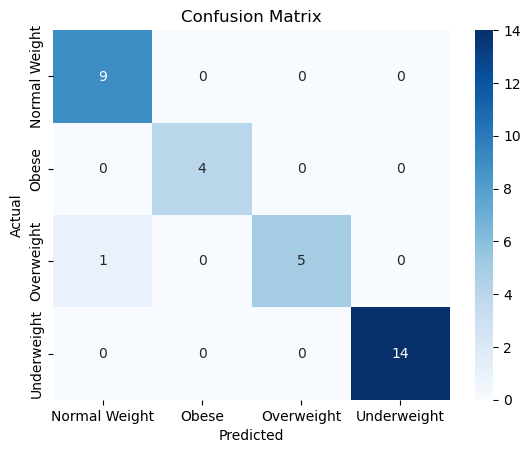

In [377]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_classes))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",
            xticklabels=label_classes, yticklabels=label_classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy_score: Shows the overall accuracy of the model.

classification_report: Provides precision, recall, and F1-score for each class.

confusion_matrix + heatmap: Visualizes how well the model predicted each class.

This helps in understanding both the overall and class-wise performance of the classifier.

## Output observation
The model evaluation shows the following results:

##### Accuracy: 96.97%

##### Precision:

Normal Weight: 0.90

Obese: 1.00

Overweight: 1.00

Underweight: 1.00

##### Recall:

Normal Weight: 1.00

Obese: 1.00

Overweight: 0.83

Underweight: 1.00

##### F1-Score:

Normal Weight: 0.95

Obese: 1.00

Overweight: 0.91

Underweight: 1.00

Macro Average: 0.96 precision, 0.96 recall, and 0.96 F1-score

Weighted Average: 0.97 precision, 0.97 recall, and 0.97 F1-score

The model performs well across all classes with the highest performance in the Obese and Underweight categories. The overall accuracy is strong, indicating effective classification.

######
## Step 13: Visualizing the Decision Tree
#### To better understand how the model makes decisions, I visualize the trained decision tree:

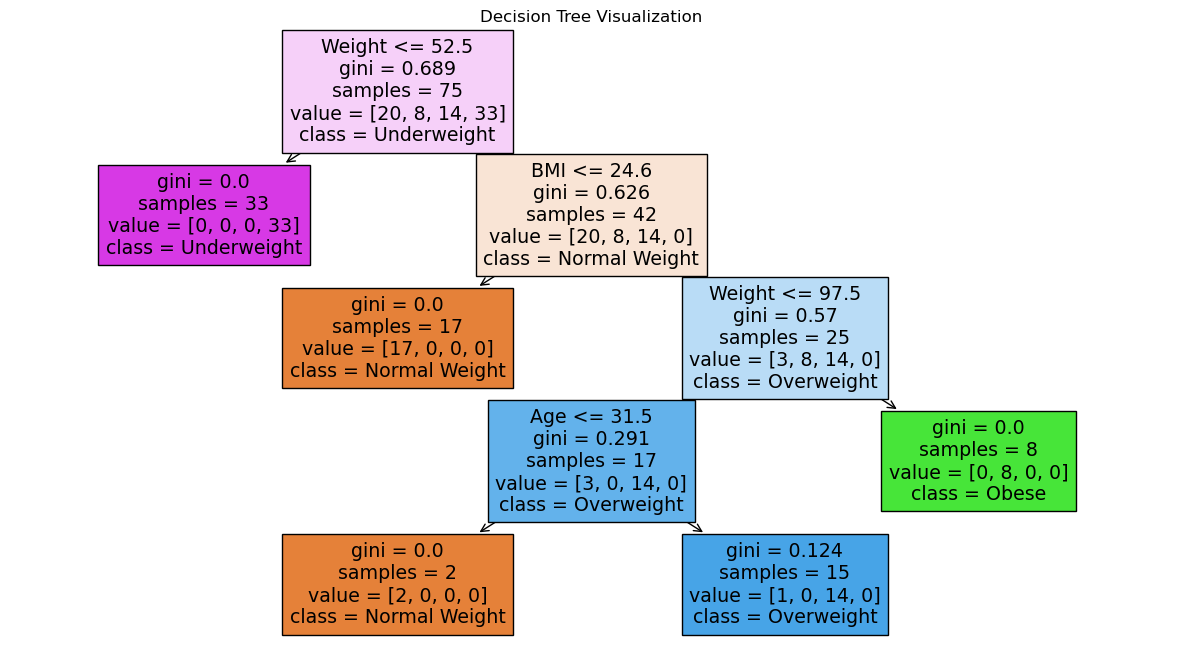

In [381]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert feature and class names to list type explicitly
feature_names = list(X.columns)
class_names = list(label_classes)

plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

plot_tree() : Plots the structure of the decision tree with feature and class names.

filled=True: Colors the nodes based on class labels for better interpretation.

This visualization provides clear insights into the decision-making logic of the model.

######
### Step 10: Hyperparameter Tuning : Tuning the Model with GridSearchCV
#### To improve model performance, I use GridSearchCV to find the best hyperparameters:

In [385]:
params = {
    "max_depth": [2, 4, 6, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}


param_grid : Defines the combinations of parameters to try.

cv=5 : Performs 5-fold cross-validation.

n_jobs=-1 : Utilizes all available CPU cores for faster processing.

grid.best_params_ : Outputs the optimal parameter combination.

This step helps in building a more accurate and generalizable decision tree model.

## Output observation
The best parameters for the decision tree are:

Criterion: 'entropy' (used to measure splits)

Max Depth: 6 (limits tree depth to avoid overfitting)

Min Samples Split: 2 (allows splitting with at least 2 samples)

######
### Step 11: Evaluating the Optimized Model
#### After tuning, I use the best estimator from GridSearchCV to make predictions and evaluate performance :

In [388]:
best_clf = grid.best_estimator_
y_pred_best = best_clf.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=label_classes))

Optimized Accuracy: 1.0
               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         9
        Obese       1.00      1.00      1.00         4
   Overweight       1.00      1.00      1.00         6
  Underweight       1.00      1.00      1.00        14

     accuracy                           1.00        33
    macro avg       1.00      1.00      1.00        33
 weighted avg       1.00      1.00      1.00        33



best_estimator_: Retrieves the model with the best hyperparameters.

predict(): Makes predictions on the test set.

accuracy_score & classification_report: Measure how well the optimized model performs.

This confirms whether tuning has improved the model's accuracy and class-wise performance.

## Output Observation :
#### Model Evaluation Summary:

Accuracy: 100% (perfect predictions).

Precision, Recall, F1-Score: 1.00 for all classes (Normal Weight, Obese, Overweight, Underweight), indicating no misclassifications.

Support: Model handles varying class sizes (from 4 to 14 samples) effectively.

Macro & Weighted Averages: Both 1.00, confirming balanced performance across all classes.

#### Considerations:
Potential overfitting due to perfect results.

Model's simplicity (max depth=4) helps generalization but could be tested for further robustness.